# Custom Yolov5 Model Training
- 같은 코드를 팀원들과 공유하여 파라미터를 달리하여 학습하여 가장 성능 좋은 모델을 서비스에서 사용했기 때문에 서비스에서 사용한 모델과 다를 수 있음

In [2]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [4]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 15926, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 15926 (delta 20), reused 23 (delta 8), pack-reused 15880
Receiving objects: 100% (15926/15926), 14.66 MiB | 11.92 MiB/s, done.
Resolving deltas: 100% (10915/10915), done.


In [5]:
%cd /content/drive/MyDrive/yolov5/

/content/drive/MyDrive/yolov5


In [6]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.5/609.5 kB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.1 MB/s eta 0:00:00


In [11]:
# 해당 경로에 library.yaml 파일 추가(아래 형식에 맞춰서 추가)
%cat /content/drive/MyDrive/yolov5/data/library.yaml

names:
- person
- burden
- empty
nc: 3
train: /content/drive/MyDrive/seat2
val: /content/drive/MyDrive/seat2


In [12]:
import yaml

with open('/content/drive/MyDrive/yolov5/data/library.yaml', 'r') as f:
  data = yaml.safe_load(f)

print(data)
# yaml train, test 경로 수정
data['train'] = '/content/drive/MyDrive/seat2'
data['val'] = '/content/drive/MyDrive/seat2'
data['nc'] = 8
data['names'] = ['person','laptop','book', 'backpack', 'bottle', 'cell phone', 'ipad', 'cloth']

with open('/content/drive/MyDrive/yolov5/data/library.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'names': ['person', 'burden', 'empty'], 'nc': 3, 'train': '/content/drive/MyDrive/seat2', 'val': '/content/drive/MyDrive/seat2'}
{'names': ['person', 'laptop', 'book', 'backpack', 'bottle', 'cell phone', 'ipad', 'cloth'], 'nc': 8, 'train': '/content/drive/MyDrive/seat2', 'val': '/content/drive/MyDrive/seat2'}


In [13]:
%cat /content/drive/MyDrive/yolov5/data/library.yaml

names:
- person
- laptop
- book
- backpack
- bottle
- cell phone
- ipad
- cloth
nc: 8
train: /content/drive/MyDrive/seat2
val: /content/drive/MyDrive/seat2


In [14]:
# 모델 학습
!python train.py --img 416 --batch 16 --epochs 50 --data /content/drive/MyDrive/yolov5/data/library.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name newSeat_50

train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/drive/MyDrive/yolov5/data/library.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=newSeat_50, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2,

In [16]:
# 모델 테스트(훈련할 때 사용하지 않은 걸로)
!python detect.py --weights /content/drive/MyDrive/yolov5/runs/train/newSeat_50/weights/best.pt --img 416 --conf 0.5 --source ../test/seat_test/000502.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/newSeat_50/weights/best.pt'], source=../test/seat_test/000502.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/test/seat_test/000502.jpg: 416x416 1 person, 4 laptops, 2 backpacks, 2 bottles, 1 cloth, 7.5ms
Speed: 0.5ms pre-process, 7.5ms inference, 1.6ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp2


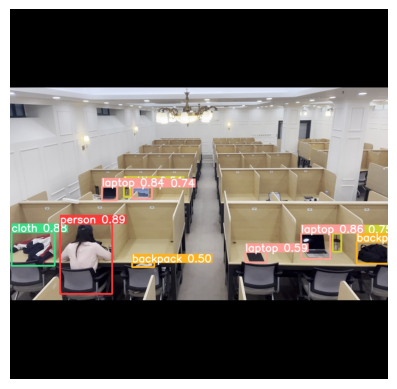

In [19]:
import matplotlib.pyplot as plt
from PIL import Image

image_path = '/content/drive/MyDrive/yolov5/runs/detect/exp2/000502.jpg'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')  # 축 제거
plt.show()